# Investigating Numerical Integration Methods

In [1]:
from Integration import *
import matplotlib.pyplot as plt
import math
%matplotlib notebook

First let's take a look at some of the differences between the different integration methods
* Riemann Left
* Riemann Right
* Midpoint
* Trapazoidal Rule
* Simpson's Rule

We will look at an easy to solve integral where we know the exact solution\
$\int_{0}^{2} x^{3} dx = \frac{1}{4}x^4 |_{0}^{2} = 4$

In [2]:
#exact solution for x^3
# our function
def f(x):
    return x**3

exact_sol = 4

We can also do the above using python lambda function. This is a great alternative to defining one line functions

In [3]:
f1 = lambda x: x**3 

Now we will define our x range and number of partitions

In [4]:
x0 = 0 #lower bound
xn = 2 #upper bound
n = 4 #number of partitions

## Riemann Left Method

<IPython.core.display.Javascript object>


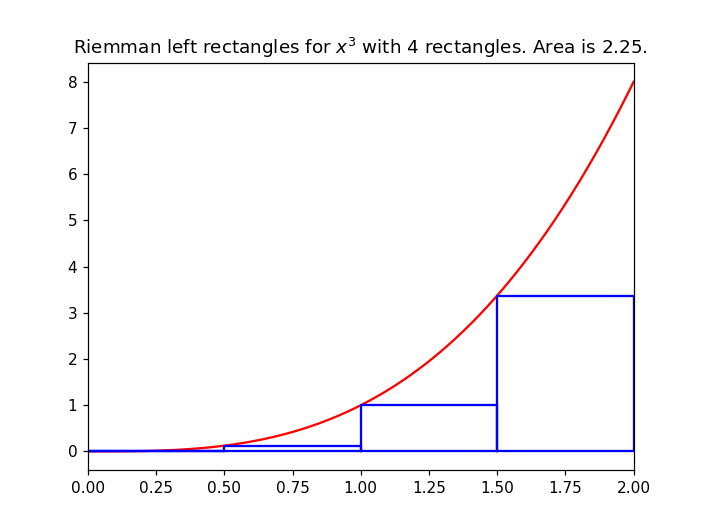

2.25

In [5]:
plot_riemann_left(f1,x0,xn,'$x^{3}$',n)

## Riemann Right Method

<IPython.core.display.Javascript object>


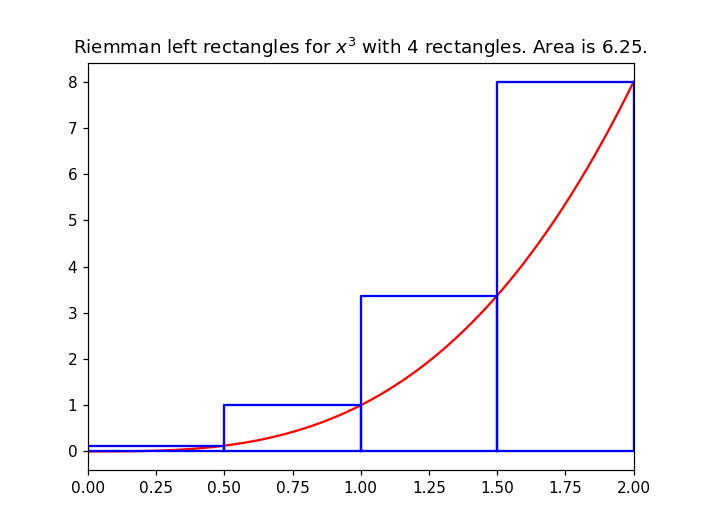

6.25

In [6]:
plot_riemann_right(f1,x0,xn,'$x^{3}$',n)

## Midpoint

<IPython.core.display.Javascript object>


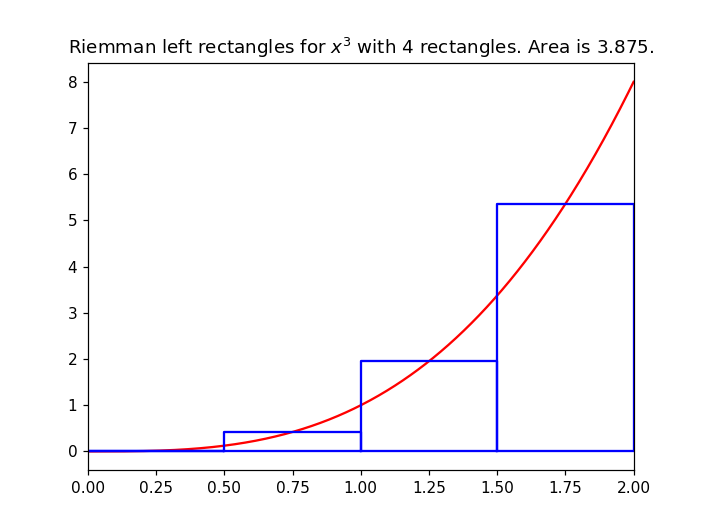

3.875

In [7]:
plot_midpoint(f1,x0,xn,'$x^{3}$',n)

## Trapazoidal Rule

<IPython.core.display.Javascript object>


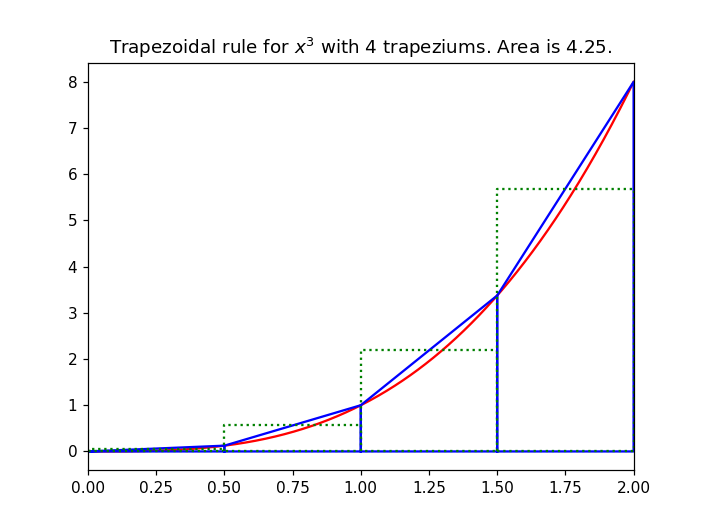

4.25

In [8]:
plot_trap(f1,x0,xn,'$x^{3}$',n)

# Numerical Comparison

In [9]:
left_sol = riemann_left(f1,x0,xn,n)
left_diff = 100*(left_sol - exact_sol)/exact_sol

right_sol = riemann_right(f1,x0,xn,n)
right_diff = 100*(right_sol - exact_sol)/exact_sol

mid_sol = midpoint(f1,x0,xn,n)
mid_diff = 100*(mid_sol - exact_sol)/exact_sol

trap_sol = trap(f1,x0,xn,n)
trap_diff = 100*(trap_sol - exact_sol)/exact_sol

simp_sol = simp(f1,x0,xn,n)
simp_diff = 100*(simp_sol - exact_sol)/exact_sol



In [10]:
print('Integral approximations\n')
print('left_sol:',left_sol)
print('right_sol:',right_sol)
print('mid_sol:',mid_sol)
print('trap_sol:',trap_sol)
print('simp_sol:',simp_sol)

Integral approximations

left_sol: 2.25
right_sol: 6.25
mid_sol: 3.875
trap_sol: 4.25
simp_sol: 4.0


In [11]:
print('Errors\n')
print('left_sol:{}%'.format(left_diff))
print('right_sol:{}%'.format(right_diff))
print('mid_sol:{}%'.format(mid_diff))
print('trap_sol:{}%'.format(trap_diff))
print('simp_sol:{}%'.format(simp_diff))


Errors

left_sol:-43.75%
right_sol:56.25%
mid_sol:-3.125%
trap_sol:6.25%
simp_sol:0.0%


Let's now look at another integral:\
$\int_{1}^{2} \frac{1}{x} dx = ln(x)|_{1}^{2} = ln(2) = 0.693147...$ 

In [12]:
f2 = lambda x : 1/x
exact_sol2 = 0.693147

x0 = 1
xn = 2
n = 4
dx = float((xn-x0)/n)

In [13]:
left_sol = riemann_left(f2,x0,xn,n)
left_diff = 100*(left_sol - exact_sol2)/exact_sol2

right_sol = riemann_right(f2,x0,xn,n)
right_diff = 100*(right_sol - exact_sol2)/exact_sol2

mid_sol = midpoint(f2,x0,xn,n)
mid_diff = 100*(mid_sol - exact_sol2)/exact_sol2

trap_sol = trap(f2,x0,xn,n)
trap_diff = 100*(trap_sol - exact_sol2)/exact_sol2

simp_sol = simp(f2,x0,xn,n)
simp_diff = 100*(simp_sol - exact_sol2)/exact_sol2

In [14]:
print('Integral approximations\n')
print('left_sol:',left_sol)
print('right_sol:',right_sol)
print('mid_sol:',mid_sol)
print('trap_sol:',trap_sol)
print('simp_sol:',simp_sol)

Integral approximations

left_sol: 0.7595238095238095
right_sol: 0.6345238095238095
mid_sol: 0.6912198912198912
trap_sol: 0.6970238095238095
simp_sol: 0.6932539682539682


In [15]:
print('Errors\n')
print('left_sol:{}%'.format(left_diff))
print('right_sol:{}%'.format(right_diff))
print('mid_sol:{}%'.format(mid_diff))
print('trap_sol:{}%'.format(trap_diff))
print('simp_sol:{}%'.format(simp_diff))

Errors

left_sol:9.57615188752307%
right_sol:-8.457540821238565%
mid_sol:-0.27802310045469586%
trap_sol:0.5593055331422531%
simp_sol:0.015432260973253282%


### How do we write the numerical integration algorithms?
We will take a look at the Reimann Left method\
Remember this says: $$\int_{x_0}^{x_n} f(x) dx \approx \Delta x [f(x_0) + f(x_1) + ...+ f(x_n)]$$

where $\Delta x = \frac{x_n - x_0}{n}$

We will write a function to perform this integration. Our function will take the arguments of a function, $f(x),\; x_0\;, x_n\;, n$


In [16]:
def riemann_sum_left(f,xmin,xmax,n_part):
    '''Approximates integral using Riemann sum of the left point.
       Takes the function f(x),
                  intitial x position, xmin,
                   final x position, xmax,
                   and number of partitions, n_part
                   as agruments'''
    #define Delta x
    dx = (xmax - xmin)/float(n_part)
    area = 0
    #first step discritize out function
    #---Method 1
    for i in range (0,n_part):
        area += dx*f(xmin + i*dx)
    
    #---Method 2
    #area = dx*math.fsum(f(xmin + i*dx) for i in range (0,n_part)) 
    
    return area

In [17]:
print(riemann_sum_left(f2,x0,xn,n))

0.7595238095238095


# Scipy 
We can use the library <a href="https://docs.scipy.org/doc/scipy/reference/integrate.html">Scipy</a> to use already written integration algorithms

In [18]:
from scipy import integrate

In [19]:
sci_quad_fixed = integrate.fixed_quad(f2,x0,xn,n=4) #Gaussian quad

sci_quad = integrate.quad(f2,x0,xn) #adaptive based on fortrane code

In [20]:
print(sci_quad)

(0.6931471805599454, 7.695479593116622e-15)


Two ways to use just the solution or error:

In [21]:
#take [0] element for solution or [1] for error
print(sci_quad[0])


0.6931471805599454


In [22]:
#assign seperate variables to each of the outputs
sci_quad_sol, sci_quad_error = integrate.quad(f2,x0,xn)

print(sci_quad_sol)

0.6931471805599454


To use scipy trapazoid integration we will need to create an array of x and y ($f(x)$) values.\
We will also need to do the same to use the Simpson method.

In [23]:
xs = np.linspace(x0,xn,n+1) #n+1 points needed for n partitions. 
ys = 1/xs
print(xs,ys)
sci_trap = integrate.trapz(ys,xs,dx)
print('sci_trap:',sci_trap)
print('our trap:', trap_sol)

[1.   1.25 1.5  1.75 2.  ] [1.         0.8        0.66666667 0.57142857 0.5       ]
sci_trap: 0.6970238095238095
our trap: 0.6970238095238095


In [24]:
sci_simp = integrate.simps(ys,xs)
print('sci_simp:',sci_simp)
print('our simp:', simp_sol)

sci_simp: 0.6932539682539682
our simp: 0.6932539682539682


Explore what else is in Scipy Integrate library!